# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


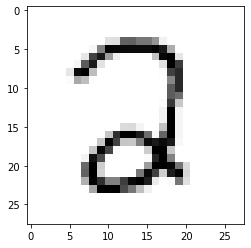

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.19252628510777361
train accuracy is: 0.8458521115005843, test accuracy is 0.8513104838709677


Epoch 10 Loss 0.05813870885828086
train accuracy is: 0.9409113670505759, test accuracy is 0.9536290322580645


Epoch 20 Loss 0.042229024417778455
train accuracy is: 0.9535136037389418, test accuracy is 0.9667338709677419


Epoch 30 Loss 0.03577317974013578
train accuracy is: 0.9598564513436821, test accuracy is 0.9722782258064516


Epoch 40 Loss 0.03207822628039993
train accuracy is: 0.9636955433149724, test accuracy is 0.9747983870967742


Epoch 50 Loss 0.029575097215443068
train accuracy is: 0.9671173426806877, test accuracy is 0.9763104838709677


Epoch 60 Loss 0.027689825412802824
train accuracy is: 0.9685361375396428, test accuracy is 0.9763104838709677


Epoch 70 Loss 0.026194273440424742
train accuracy is: 0.9697045568352529, test accuracy is 0.9773185483870968


Epoch 80 Loss 0.024954647838316902
train accuracy is: 0.971290268736438, test accuracy is 0.9773185483870968


Epoch 90 Loss 0.023875323889418473
train accuracy is: 0.972458688032048, test accuracy is 0.9778225806451613


Epoch 100 Loss 0.022934652572215518
train accuracy is: 0.9734601902854282, test accuracy is 0.9783266129032258


Epoch 110 Loss 0.02207926342092424
train accuracy is: 0.9750459021866132, test accuracy is 0.9788306451612904


Epoch 120 Loss 0.02133704849927556
train accuracy is: 0.9761308629611083, test accuracy is 0.9783266129032258


Epoch 130 Loss 0.020641838728267928
train accuracy is: 0.9772158237356035, test accuracy is 0.9793346774193549


Epoch 140 Loss 0.019992703619447046
train accuracy is: 0.9777165748622935, test accuracy is 0.9793346774193549


Epoch 150 Loss 0.01938428479224026
train accuracy is: 0.9783007845100985, test accuracy is 0.9793346774193549


Epoch 160 Loss 0.01882167598626846
train accuracy is: 0.9790519112001336, test accuracy is 0.9793346774193549


Epoch 170 Loss 0.01828464372412665
train accuracy is: 0.9795526623268236, test accuracy is 0.9793346774193549


Epoch 180 Loss 0.017774909539185417
train accuracy is: 0.9803037890168587, test accuracy is 0.9793346774193549


Epoch 190 Loss 0.017290220982754803
train accuracy is: 0.9810549157068936, test accuracy is 0.9803427419354839


Epoch 200 Loss 0.01683357875975576
train accuracy is: 0.9817225838758137, test accuracy is 0.9793346774193549


Epoch 210 Loss 0.016389269846392412
train accuracy is: 0.9823902520447337, test accuracy is 0.9793346774193549


Epoch 220 Loss 0.01595695506559053
train accuracy is: 0.9829744616925388, test accuracy is 0.9798387096774194


Epoch 230 Loss 0.015567417648693087
train accuracy is: 0.9840594224670339, test accuracy is 0.9798387096774194


Epoch 240 Loss 0.015182313092134893
train accuracy is: 0.9843097980303789, test accuracy is 0.9798387096774194


0.0038019587485373287

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.26946806839070875
train accuracy is: 0.556835252879319, test accuracy is 0.5433467741935484


Epoch 10 Loss 0.10684520872663095
train accuracy is: 0.9016858621265231, test accuracy is 0.9092741935483871


Epoch 20 Loss 0.08084210922879514
train accuracy is: 0.9248873309964948, test accuracy is 0.9375


Epoch 30 Loss 0.06919277756355745
train accuracy is: 0.9343181438824903, test accuracy is 0.9450604838709677


Epoch 40 Loss 0.062290150203834445
train accuracy is: 0.9400767818394258, test accuracy is 0.9511088709677419


Epoch 50 Loss 0.05762816630312454
train accuracy is: 0.943665498247371, test accuracy is 0.9556451612903226


Epoch 60 Loss 0.05422046137323758
train accuracy is: 0.9460857953597063, test accuracy is 0.9571572580645161


Epoch 70 Loss 0.05159846582457115
train accuracy is: 0.9471707561342013, test accuracy is 0.9576612903225806


Epoch 80 Loss 0.04950004410120458
train accuracy is: 0.9491737606409615, test accuracy is 0.9596774193548387


Epoch 90 Loss 0.04777535105260848
train accuracy is: 0.9515940577532966, test accuracy is 0.9601814516129032


Epoch 100 Loss 0.04632374415288557
train accuracy is: 0.9528459355700217, test accuracy is 0.9621975806451613


Epoch 110 Loss 0.04507981489998753
train accuracy is: 0.9538474378234018, test accuracy is 0.9627016129032258


Epoch 120 Loss 0.044000027207892374
train accuracy is: 0.9549323985978968, test accuracy is 0.9637096774193549


Epoch 130 Loss 0.04304961541730902
train accuracy is: 0.9556835252879319, test accuracy is 0.9637096774193549


Epoch 140 Loss 0.04220469989447813
train accuracy is: 0.9563511934568519, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.04144722980410682
train accuracy is: 0.9567684860624269, test accuracy is 0.9652217741935484


Epoch 160 Loss 0.04076248912802679
train accuracy is: 0.957352695710232, test accuracy is 0.9657258064516129


Epoch 170 Loss 0.04013994512596371
train accuracy is: 0.9577699883158071, test accuracy is 0.9652217741935484


Epoch 180 Loss 0.03957116771011792
train accuracy is: 0.958020363879152, test accuracy is 0.9662298387096774


Epoch 190 Loss 0.03904734939125237
train accuracy is: 0.9584376564847271, test accuracy is 0.9667338709677419


Epoch 200 Loss 0.03856420291966988
train accuracy is: 0.9585211150058421, test accuracy is 0.9672379032258065


Epoch 210 Loss 0.03811556618954524
train accuracy is: 0.9584376564847271, test accuracy is 0.9682459677419355


Epoch 220 Loss 0.037697616584405395
train accuracy is: 0.9590218661325322, test accuracy is 0.9682459677419355


Epoch 230 Loss 0.03730809767496828
train accuracy is: 0.9596060757803372, test accuracy is 0.9682459677419355


Epoch 240 Loss 0.03694227851851409
train accuracy is: 0.9599399098647972, test accuracy is 0.9682459677419355


0.08659227914402594

### Comparing results of NN and LR

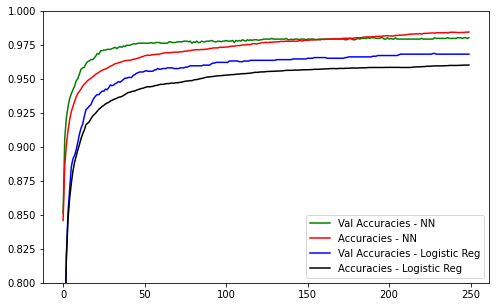

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

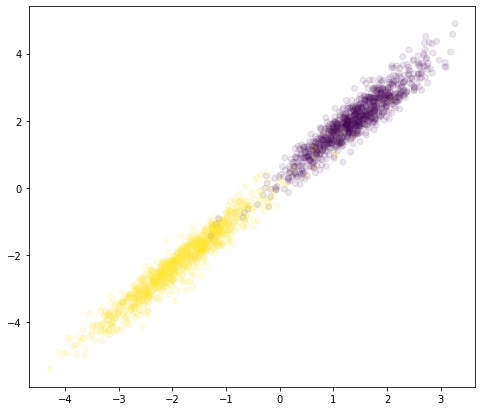

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

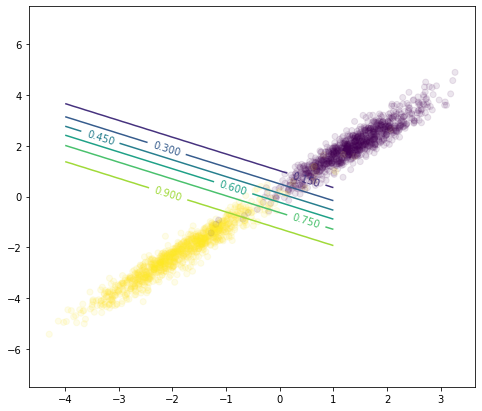

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );